<a href="https://colab.research.google.com/github/saim-glitch/Freelancing/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download('uciml/pima-indians-diabetes-database')
print("Path to dataset files:", path)

# Basic Overview
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load
df = pd.read_csv(path + '/diabetes.csv')

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [2]:
# Basic dataset info
print("=== Dataset Overview ===")
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target variable: {df.columns[-1]}")
print("\nData types:")
print(df.dtypes)

=== Dataset Overview ===
Dataset shape: (768, 9)
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Target variable: Outcome

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [3]:
# Examine diabetes prevalence
print("\n=== Target Variable Analysis ===")
diabetes_dist = df['Outcome'].value_counts()
print("Diabetes distribution:")
print(diabetes_dist)
print(f"Diabetes prevalence: {df['Outcome'].mean():.1%}")


=== Target Variable Analysis ===
Diabetes distribution:
Outcome
0    500
1    268
Name: count, dtype: int64
Diabetes prevalence: 34.9%


In [4]:
# Compare feature means between diabetic and non-diabetic groups
diabetes_yes = df[df['Outcome'] == 1]
diabetes_no = df[df['Outcome'] == 0]

print("\n=== Feature Means by Diabetes Status ===")
feature_means = pd.DataFrame({
    'No_Diabetes': diabetes_no.drop('Outcome', axis=1).mean(),
    'Diabetes': diabetes_yes.drop('Outcome', axis=1).mean()
})
feature_means['Difference'] = feature_means['Diabetes'] - feature_means['No_Diabetes']
print(feature_means.round(2))


=== Feature Means by Diabetes Status ===
                          No_Diabetes  Diabetes  Difference
Pregnancies                      3.30      4.87        1.57
Glucose                        109.98    141.26       31.28
BloodPressure                   68.18     70.82        2.64
SkinThickness                   19.66     22.16        2.50
Insulin                         68.79    100.34       31.54
BMI                             30.30     35.14        4.84
DiabetesPedigreeFunction         0.43      0.55        0.12
Age                             31.19     37.07        5.88



=== Glucose Analysis ===
Glucose - No Diabetes: 110.0 ± 26.1
Glucose - Diabetes: 141.3 ± 31.9


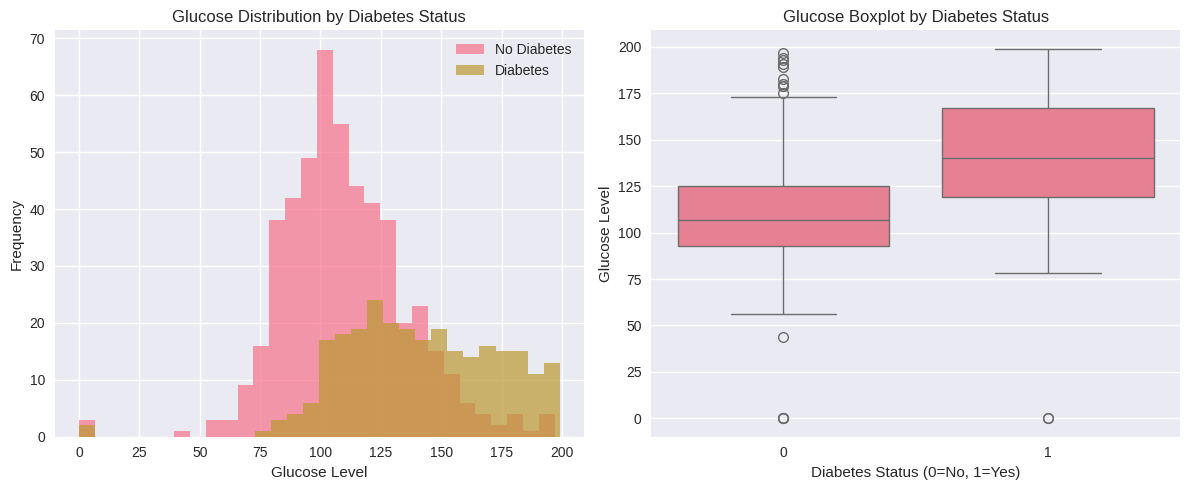

In [5]:
# Detailed glucose analysis
print("\n=== Glucose Analysis ===")
print(f"Glucose - No Diabetes: {diabetes_no['Glucose'].mean():.1f} ± {diabetes_no['Glucose'].std():.1f}")
print(f"Glucose - Diabetes: {diabetes_yes['Glucose'].mean():.1f} ± {diabetes_yes['Glucose'].std():.1f}")

# Glucose distribution plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(diabetes_no['Glucose'], alpha=0.7, label='No Diabetes', bins=30)
plt.hist(diabetes_yes['Glucose'], alpha=0.7, label='Diabetes', bins=30)
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Glucose Distribution by Diabetes Status')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='Glucose')
plt.title('Glucose Boxplot by Diabetes Status')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('Glucose Level')

plt.tight_layout()
plt.show()


=== BMI Analysis ===
BMI - No Diabetes: 30.3
BMI - Diabetes: 35.1


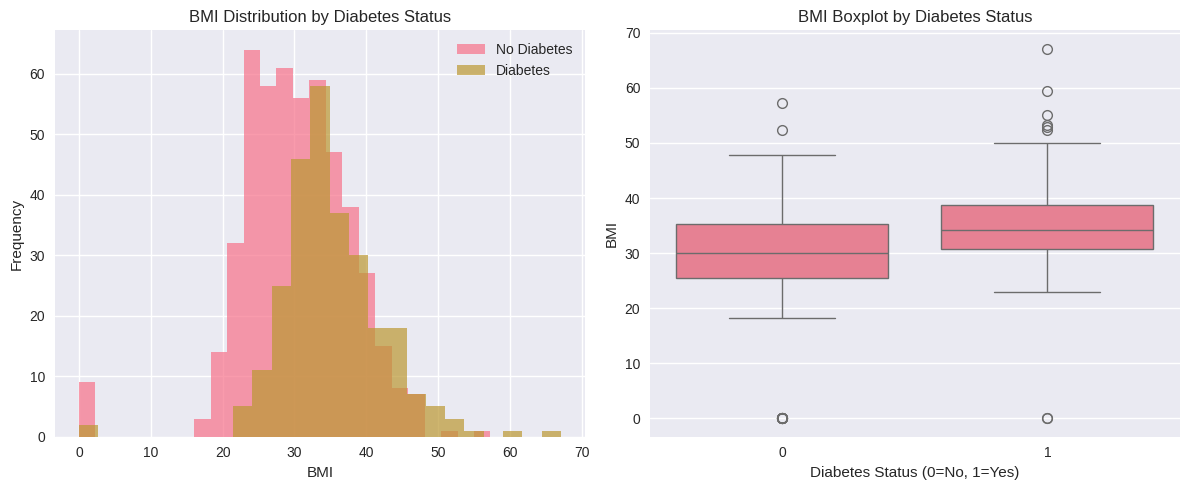

In [6]:
# BMI analysis
print("\n=== BMI Analysis ===")
print(f"BMI - No Diabetes: {diabetes_no['BMI'].mean():.1f}")
print(f"BMI - Diabetes: {diabetes_yes['BMI'].mean():.1f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(diabetes_no['BMI'], alpha=0.7, label='No Diabetes', bins=25)
plt.hist(diabetes_yes['BMI'], alpha=0.7, label='Diabetes', bins=25)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution by Diabetes Status')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Outcome', y='BMI')
plt.title('BMI Boxplot by Diabetes Status')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()


=== Age Analysis ===
Diabetes rate by age group:
Outcome       0     1
Age_Group            
<30        78.4  21.6
30-40      51.6  48.4
41-50      43.4  56.6
>50        53.1  46.9


<Figure size 1000x600 with 0 Axes>

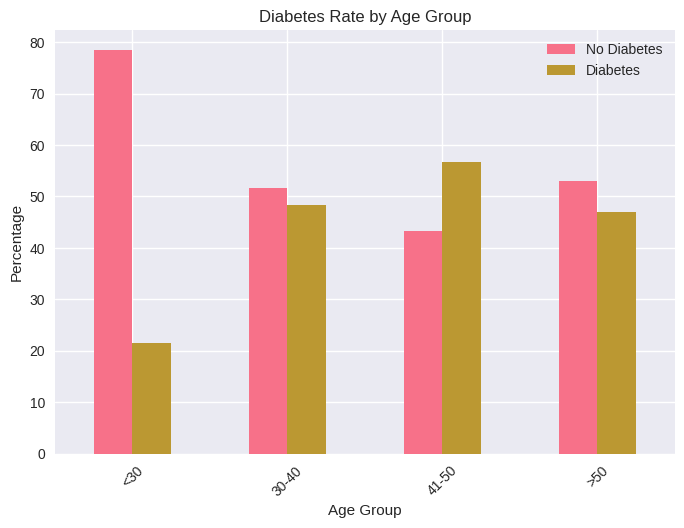

In [7]:
# Age analysis
print("\n=== Age Analysis ===")
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 100], labels=['<30', '30-40', '41-50', '>50'])
age_diabetes = pd.crosstab(df['Age_Group'], df['Outcome'], normalize='index') * 100

print("Diabetes rate by age group:")
print(age_diabetes.round(1))

# Plot age group analysis
plt.figure(figsize=(10, 6))
age_diabetes.plot(kind='bar')
plt.title('Diabetes Rate by Age Group')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.legend(['No Diabetes', 'Diabetes'])
plt.xticks(rotation=45)
plt.show()

In [8]:
# Check unrealistic zero values
print("\n=== Zero Values Analysis ===")
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

zero_analysis = {}
for col in zero_cols:
    if col in df.columns:
        zero_count = (df[col] == 0).sum()
        zero_pct = zero_count / len(df) * 100
        zero_analysis[col] = {'Count': zero_count, 'Percentage': zero_pct}
        print(f"{col}: {zero_count} zeros ({zero_pct:.1f}%)")


=== Zero Values Analysis ===
Glucose: 5 zeros (0.7%)
BloodPressure: 35 zeros (4.6%)
SkinThickness: 227 zeros (29.6%)
Insulin: 374 zeros (48.7%)
BMI: 11 zeros (1.4%)



=== Correlation Analysis ===
Correlation with Diabetes (Outcome):
Glucose                     0.467
BMI                         0.293
Age                         0.238
Pregnancies                 0.222
DiabetesPedigreeFunction    0.174
Insulin                     0.131
SkinThickness               0.075
BloodPressure               0.065
Name: Outcome, dtype: float64


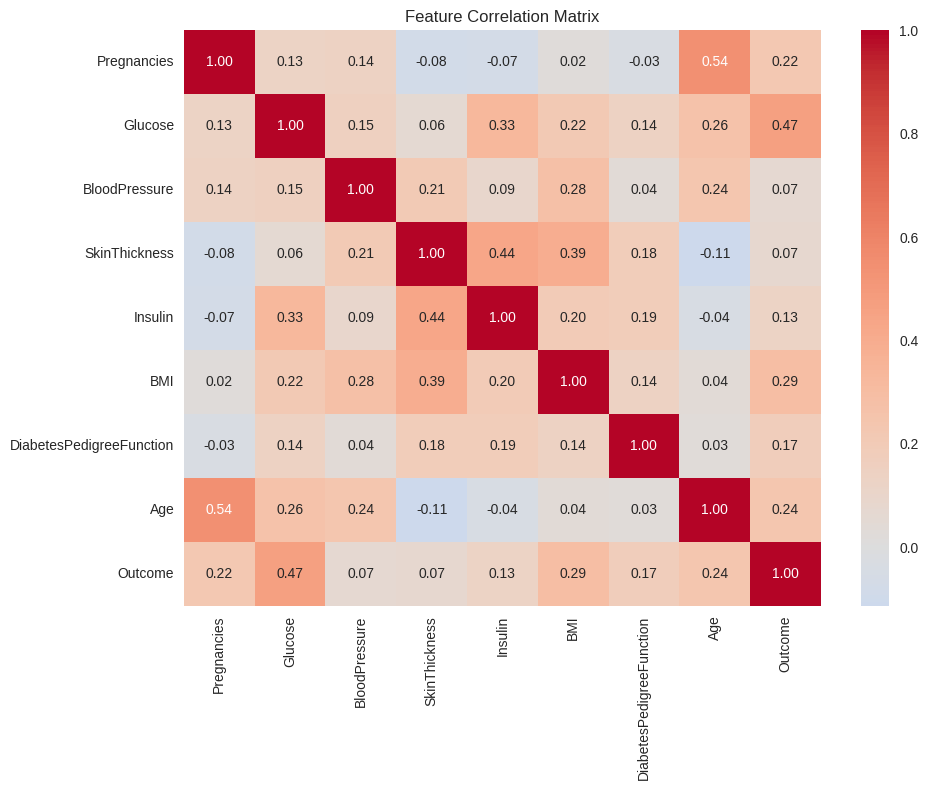

In [9]:
# Correlation analysis
print("\n=== Correlation Analysis ===")

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
diabetes_corr = correlation_matrix['Outcome'].drop('Outcome').sort_values(ascending=False)

print("Correlation with Diabetes (Outcome):")
print(diabetes_corr.round(3))

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [10]:
# Summary of key findings
print("\n=== Key EDA Insights ===")
print("1. Most correlated features with diabetes:")
for feature, corr in diabetes_corr.head(3).items():
    print(f"   - {feature}: {corr:.3f}")

print("2. Clear patterns in key features:")
print(f"   - Glucose: Diabetic avg {diabetes_yes['Glucose'].mean():.1f} vs Non-diabetic {diabetes_no['Glucose'].mean():.1f}")
print(f"   - BMI: Diabetic avg {diabetes_yes['BMI'].mean():.1f} vs Non-diabetic {diabetes_no['BMI'].mean():.1f}")


=== Key EDA Insights ===
1. Most correlated features with diabetes:
   - Glucose: 0.467
   - BMI: 0.293
   - Age: 0.238
2. Clear patterns in key features:
   - Glucose: Diabetic avg 141.3 vs Non-diabetic 110.0
   - BMI: Diabetic avg 35.1 vs Non-diabetic 30.3


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [12]:
print("=== Data Quality Check ===")
print(f"Missing values in dataset: {df.isnull().sum().sum()}")
print("\nMissing values by column:")
print(df.isnull().sum())

=== Data Quality Check ===
Missing values in dataset: 0

Missing values by column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_Group                   0
dtype: int64


In [13]:
# Handle unrealistic zero values
print("\n=== Handling Zero Values ===")
print("Zero values in each column:")
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/len(df)*100:.1f}%)")

# Create a copy for preprocessing
df_processed = df.copy()

# Replace zeros with median for critical features
critical_features = ['Glucose', 'BloodPressure', 'BMI']
for feature in critical_features:
    if feature in df_processed.columns:
        # Calculate median of non-zero values
        median_val = df_processed[df_processed[feature] > 0][feature].median()
        # Replace zeros with median
        df_processed[feature] = df_processed[feature].replace(0, median_val)
        print(f"{feature}: Replaced zeros with median {median_val:.1f}")

print("\nKept zeros in SkinThickness and Insulin (may be valid value)")


=== Handling Zero Values ===
Zero values in each column:
Glucose: 5 zeros (0.7%)
BloodPressure: 35 zeros (4.6%)
SkinThickness: 227 zeros (29.6%)
Insulin: 374 zeros (48.7%)
BMI: 11 zeros (1.4%)
Glucose: Replaced zeros with median 117.0
BloodPressure: Replaced zeros with median 72.0
BMI: Replaced zeros with median 32.3

Kept zeros in SkinThickness and Insulin (may be valid value)


In [14]:
# Define features and target variable
print("\n=== Feature and Target Definition ===")

# Feature columns
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df_processed[feature_cols].copy()
y = df_processed['Outcome'].copy()

print(f"Features: {feature_cols}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Target distribution: {y.value_counts().tolist()}")


=== Feature and Target Definition ===
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Feature matrix shape: (768, 8)
Target vector shape: (768,)
Target distribution: [500, 268]


In [15]:
# Create train/validation/test splits
print("\n=== Data Splitting ===")

# 80% temp (train+val), 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 60% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check target distribution
print(f"\nTarget distribution:")
print(f"Original: {y.mean():.3f}")
print(f"Train: {y_train.mean():.3f}")
print(f"Validation: {y_val.mean():.3f}")
print(f"Test: {y_test.mean():.3f}")


=== Data Splitting ===
Training set:   460 samples (59.9%)
Validation set: 154 samples (20.1%)
Test set:       154 samples (20.1%)

Target distribution:
Original: 0.349
Train: 0.348
Validation: 0.351
Test: 0.351


In [16]:
# Apply feature scaling
print("\n=== Feature Scaling ===")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("StandardScaler applied to all features")
print(f"Trained on {X_train.shape[0]} samples")

# Verify scaling
print(f"\nTraining set after scaling:")
print(f"Mean: {X_train_scaled.mean(axis=0).round(3)}")
print(f"Std:  {X_train_scaled.std(axis=0).round(3)}")


=== Feature Scaling ===
StandardScaler applied to all features
Trained on 460 samples

Training set after scaling:
Mean: [ 0.  0.  0. -0. -0.  0. -0. -0.]
Std:  [1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
# Final verification
print("\n=== Final Verification ===")
print("Checking for any preprocessing issues...")

# Check for NaN or infinite values
print(f"NaN values in training set: {np.isnan(X_train_scaled).sum()}")
print(f"Infinite values in training set: {np.isinf(X_train_scaled).sum()}")

# Check feature ranges after scaling
print(f"Feature ranges after scaling:")
print(f"Min values: {X_train_scaled.min(axis=0).round(3)}")
print(f"Max values: {X_train_scaled.max(axis=0).round(3)}")


=== Final Verification ===
Checking for any preprocessing issues...
NaN values in training set: 0
Infinite values in training set: 0
Feature ranges after scaling:
Min values: [-1.143 -2.252 -3.888 -1.304 -0.737 -2.075 -1.174 -1.033]
Max values: [3.094 2.572 3.424 4.83  6.166 5.038 5.409 4.089]


# **4. Model Training¶**
**Model Selection Justification:** Random Forest vs Logistic Regression
Why These Two Models Were Chosen
Random Forest
Ensemble Learning Advantages:

Combines multiple decision trees to reduce overfitting
Averages predictions from many trees for more robust results
Naturally handles non-linear relationships in the data
Suitability for Medical Data:

Provides feature importance rankings crucial for clinical interpretation
Handles missing values and outliers better than many other algorithms
Works well with mixed data types (numerical + categorical)
Less sensitive to feature scaling
Expected Benefits:

Should capture complex interactions between features (e.g., age + BMI effect)
Robust to the zero values present in our dataset
Will identify which medical indicators are most predictive
Logistic Regression - Theoretical Rationale
Linear Model Strengths:

Highly interpretable coefficients showing each feature's impact
Less prone to overfitting, especially with limited data
Fast training and prediction
Well-established in medical research
Clinical Interpretability:

Coefficients represent odds ratios - easy for doctors to understand
Linear relationship assumptions align with many medical guidelines
Simpler model means fewer parameters to tune
Expected Benefits:

Should provide stable, reliable baseline performance
Coefficients will show direct relationship between features and diabetes risk
Less likely to overfit our relatively small dataset (768 samples)
Model Selection Strategy
Both models complement each other:

Random Forest is expected to:

Achieve higher performance if complex patterns exist
Provide feature importance for understanding data
Potentially overfit if not properly regularized
Logistic Regression is expected to:

Provide more stable, interpretable results
Serve as a strong baseline for comparison
Generalize better with limited data
Next Steps
After training both models, we will evaluate:

Predictive Performance - Accuracy, AUC, precision, recall
Generalization - Training vs validation performance gap
Clinical Interpretability - Feature importance vs coefficient analysis
Robustness - Cross-validation stability
The final model selection will be based on which approach best balances predictive accuracy with clinical interpretability and generalization performance. This empirical evaluation will determine whether the theoretical advantages of Random Forest translate to superior real-world performance on our diabetes prediction task.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Initialize model
print("\n=== Model Initialization ===")

rf_model = RandomForestClassifier(
    n_estimators=30,
    max_depth=4,
    min_samples_split=30,
    min_samples_leaf=15,
    max_features=0.3,
    max_leaf_nodes=20,
    bootstrap=True,
    random_state=42
)


lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='lbfgs'
)

models = {
    'Random Forest': rf_model,
    'Logistic Regression': lr_model
}

print("Models initialized:")
for name, model in models.items():
    print(f"- {name}: {type(model).__name__}")


=== Model Initialization ===
Models initialized:
- Random Forest: RandomForestClassifier
- Logistic Regression: LogisticRegression


In [20]:
# Train both models
print("\n=== Model Training ===")
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Get predictions
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)

    # Get prediction probabilities
    y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
    y_val_proba = model.predict_proba(X_val_scaled)[:, 1]

    # Store results
    results[name] = {
        'model': model,
        'y_train_pred': y_train_pred,
        'y_val_pred': y_val_pred,
        'y_train_proba': y_train_proba,
        'y_val_proba': y_val_proba
    }

    print(f"{name} training completed")


=== Model Training ===

Training Random Forest...
Random Forest training completed

Training Logistic Regression...
Logistic Regression training completed


# **5. Model Analyziation and Visualization**

In [21]:
# Calculate performance metrics
print("\n=== Model Performance Evaluation ===")

for name in models.keys():
    print(f"\n{name} Results:")

    # Get stored results
    model_results = results[name]

    # Calculate accuracy
    train_acc = accuracy_score(y_train, model_results['y_train_pred'])
    val_acc = accuracy_score(y_val, model_results['y_val_pred'])

    # Calculate AUC
    train_auc = roc_auc_score(y_train, model_results['y_train_proba'])
    val_auc = roc_auc_score(y_val, model_results['y_val_proba'])

    # Store metrics
    results[name].update({
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_auc': train_auc,
        'val_auc': val_auc,
        'overfitting': train_acc - val_acc
    })

    print(f"  Training Accuracy: {train_acc:.3f}")
    print(f"  Validation Accuracy: {val_acc:.3f}")
    print(f"  Training AUC: {train_auc:.3f}")
    print(f"  Validation AUC: {val_auc:.3f}")
    print(f"  Overfitting (Acc diff): {train_acc - val_acc:.3f}")


=== Model Performance Evaluation ===

Random Forest Results:
  Training Accuracy: 0.815
  Validation Accuracy: 0.792
  Training AUC: 0.886
  Validation AUC: 0.863
  Overfitting (Acc diff): 0.023

Logistic Regression Results:
  Training Accuracy: 0.800
  Validation Accuracy: 0.779
  Training AUC: 0.848
  Validation AUC: 0.852
  Overfitting (Acc diff): 0.021


In [22]:
# Perform cross-validation
print("\n=== Cross-Validation ===")

for name, model in models.items():
    print(f"\n{name} Cross-Validation:")

    # 5-fold cross-validation on training data
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')

    # Store CV results
    results[name]['cv_scores'] = cv_scores
    results[name]['cv_mean'] = cv_scores.mean()
    results[name]['cv_std'] = cv_scores.std()

    print(f"  CV AUC Scores: {cv_scores.round(3)}")
    print(f"  Mean CV AUC: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")
    print(f"  CV Stability: {'Good' if cv_scores.std() < 0.05 else 'Moderate' if cv_scores.std() < 0.1 else 'Poor'}")


=== Cross-Validation ===

Random Forest Cross-Validation:
  CV AUC Scores: [0.828 0.8   0.775 0.797 0.815]
  Mean CV AUC: 0.803 (±0.018)
  CV Stability: Good

Logistic Regression Cross-Validation:
  CV AUC Scores: [0.859 0.842 0.811 0.827 0.836]
  Mean CV AUC: 0.835 (±0.016)
  CV Stability: Good



=== Best Model Selection ===
Random Forest - Validation AUC: 0.863
Logistic Regression - Validation AUC: 0.852

Best Model: Random Forest (AUC: 0.863)

=== Feature Importance Analysis ===
Feature Importance Ranking:
                    feature  importance
1                   Glucose    0.379282
5                       BMI    0.219811
7                       Age    0.130994
6  DiabetesPedigreeFunction    0.087345
4                   Insulin    0.061302
0               Pregnancies    0.050133
3             SkinThickness    0.036440
2             BloodPressure    0.034694


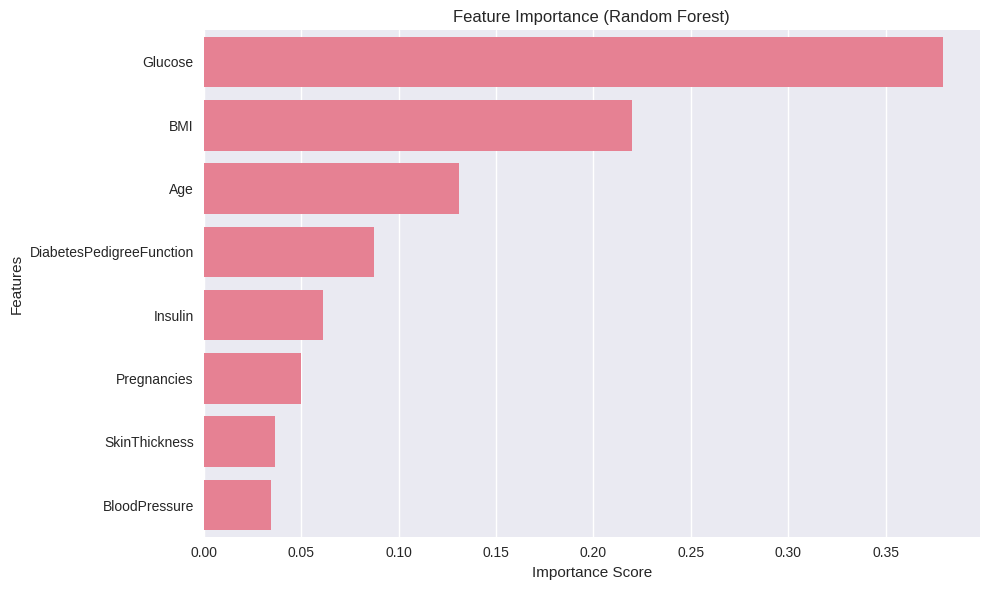


Top 3 Most Important Features:
2. Glucose: 0.379
6. BMI: 0.220
8. Age: 0.131

=== Test Set Performance ===
Final Test Results (Random Forest):
  Accuracy: 0.734
  AUC-ROC: 0.784

Validation vs Test Comparison:
  Validation Accuracy: 0.792 → Test Accuracy: 0.734 (diff: -0.058)
  Validation AUC: 0.863 → Test AUC: 0.784 (diff: -0.079)
⚠ Model may be overfitting (AUC difference > 0.05)

=== Detailed Test Set Analysis ===


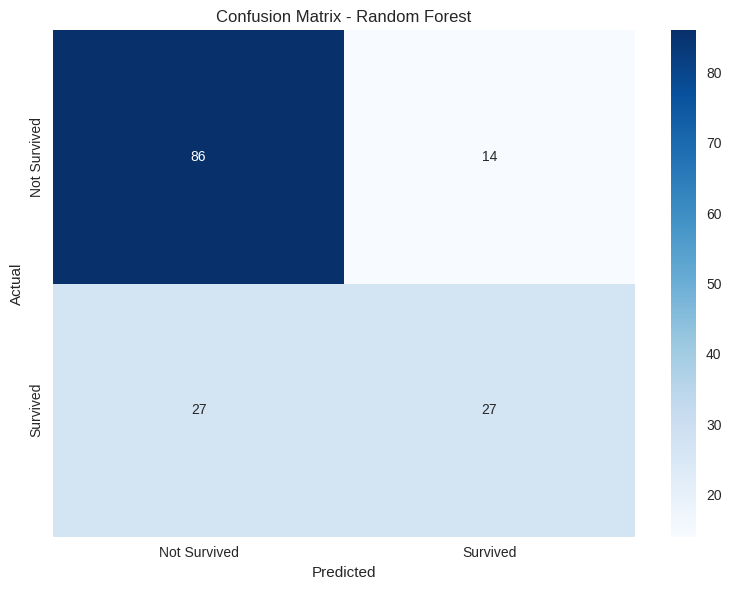


Classification Report (Random Forest):
              precision    recall  f1-score   support

Not Survived       0.76      0.86      0.81       100
    Survived       0.66      0.50      0.57        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154


=== Final Model Comparison Summary ===
                 Model  Val_Accuracy  Val_AUC  CV_Mean_AUC  CV_Std  \
0        Random Forest         0.792    0.863        0.803   0.018   
1  Logistic Regression         0.779    0.852        0.835   0.016   

   Overfitting  
0        0.023  
1        0.021  

 Winner of this research: Random Forest
Final Test AUC: 0.784
Final Test Accuracy: 0.734


In [23]:
# Select the best model based on validation AUC
print("\n=== Best Model Selection ===")

# Find best model based on validation AUC
best_val_auc = 0
best_model_name = None

for name in models.keys():
    val_auc = results[name]['val_auc']
    print(f"{name} - Validation AUC: {val_auc:.3f}")

    if val_auc > best_val_auc:
        best_val_auc = val_auc
        best_model_name = name

best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} (AUC: {best_val_auc:.3f})")

# Feature importance analysis
if best_model_name == 'Random Forest':
    print("\n=== Feature Importance Analysis ===")

    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Feature Importance Ranking:")
    print(feature_importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

    print(f"\nTop 3 Most Important Features:")
    for i, row in feature_importance.head(3).iterrows():
        print(f"{i+1}. {row['feature']}: {row['importance']:.3f}")

elif best_model_name == 'Logistic Regression':
    print("\n=== Feature Coefficients Analysis ===")

    # Get feature coefficients for logistic regression
    feature_coefs = pd.DataFrame({
        'feature': feature_cols,
        'coefficient': best_model.coef_[0],
        'abs_coefficient': np.abs(best_model.coef_[0])
    }).sort_values('abs_coefficient', ascending=False)

    print("Feature Coefficients Ranking (by absolute value):")
    print(feature_coefs)

    # Plot feature coefficients
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_coefs, x='coefficient', y='feature')
    plt.title('Feature Coefficients (Logistic Regression)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f"\nTop 3 Most Important Features (by absolute coefficient):")
    for i, row in feature_coefs.head(3).iterrows():
        print(f"{i+1}. {row['feature']}: {row['coefficient']:.3f}")

# Test set performance
print("\n=== Test Set Performance ===")

# Get final predictions on test set
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

test_acc = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"Final Test Results ({best_model_name}):")
print(f"  Accuracy: {test_acc:.3f}")
print(f"  AUC-ROC: {test_auc:.3f}")

# Compare with validation performance
val_acc = results[best_model_name]['val_acc']
val_auc = results[best_model_name]['val_auc']

print(f"\nValidation vs Test Comparison:")
print(f"  Validation Accuracy: {val_acc:.3f} → Test Accuracy: {test_acc:.3f} (diff: {test_acc - val_acc:+.3f})")
print(f"  Validation AUC: {val_auc:.3f} → Test AUC: {test_auc:.3f} (diff: {test_auc - val_auc:+.3f})")

# Performance generalization check
if abs(test_auc - val_auc) <= 0.02:
    print("✓ Model generalizes well (AUC difference ≤ 0.02)")
elif abs(test_auc - val_auc) <= 0.05:
    print("⚠ Model shows moderate generalization (AUC difference ≤ 0.05)")
else:
    print("⚠ Model may be overfitting (AUC difference > 0.05)")

# Create confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print(f"\n=== Detailed Test Set Analysis ===")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Classification Report
print(f"\nClassification Report ({best_model_name}):")
print(classification_report(y_test, y_test_pred,
                          target_names=['Not Survived', 'Survived']))

# Model comparison summary
print(f"\n=== Final Model Comparison Summary ===")
comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Val_Accuracy': [results[name]['val_acc'] for name in models.keys()],
    'Val_AUC': [results[name]['val_auc'] for name in models.keys()],
    'CV_Mean_AUC': [results[name]['cv_mean'] for name in models.keys()],
    'CV_Std': [results[name]['cv_std'] for name in models.keys()],
    'Overfitting': [results[name]['overfitting'] for name in models.keys()]
})

print(comparison_df.round(3))

print(f"\n Winner of this research: {best_model_name}")
print(f"Final Test AUC: {test_auc:.3f}")
print(f"Final Test Accuracy: {test_acc:.3f}")


=== Confusion Matrix Analysis ===
Confusion Matrix:
[[86 14]
 [27 27]]


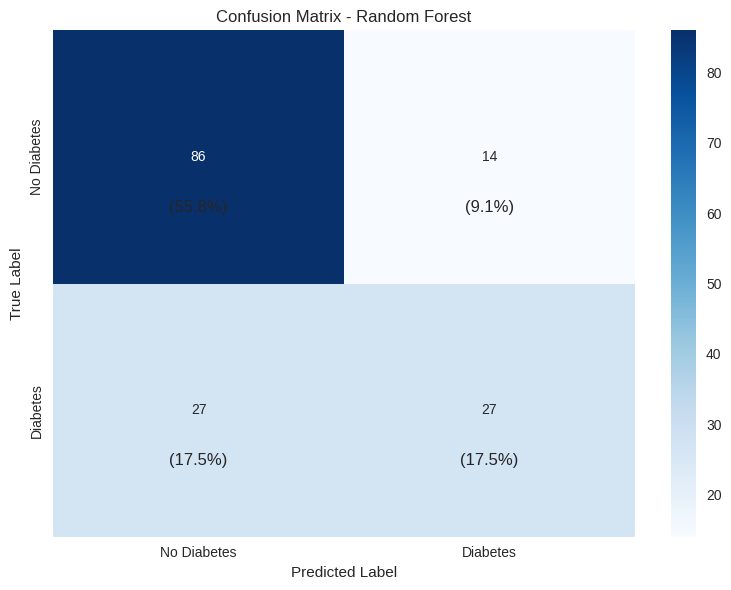


Confusion Matrix Breakdown:
True Negatives (Correct No Diabetes): 86
False Positives (Incorrect Diabetes): 14
False Negatives (Missed Diabetes): 27
True Positives (Correct Diabetes): 27


In [24]:
# Create and visualize confusion matrix
print("\n=== Confusion Matrix Analysis ===")

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Add percentage annotations
for i in range(2):
    for j in range(2):
        plt.text(j+0.5, i+0.7, f'({cm[i,j]/cm.sum()*100:.1f}%)',
                ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

# Analyze confusion matrix
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (Correct No Diabetes): {tn}")
print(f"False Positives (Incorrect Diabetes): {fp}")
print(f"False Negatives (Missed Diabetes): {fn}")
print(f"True Positives (Correct Diabetes): {tp}")


=== ROC Curve Analysis ===


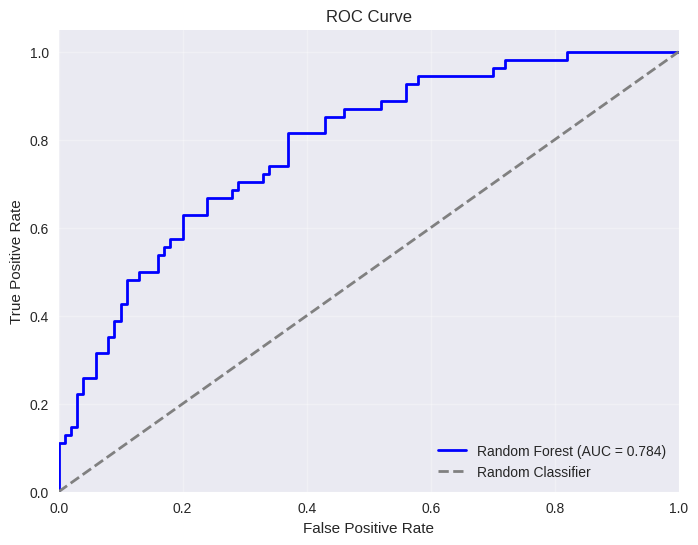

Optimal threshold: 0.315
At optimal threshold - TPR: 0.815, FPR: 0.370


In [25]:
# ROC Curve analysis
print("\n=== ROC Curve Analysis ===")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'{best_model_name} (AUC = {test_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Find optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"At optimal threshold - TPR: {tpr[optimal_idx]:.3f}, FPR: {fpr[optimal_idx]:.3f}")


=== Error Analysis ===
False Positives: 14 cases
Average probability for false positives: 0.593
False Negatives: 27 cases
Average probability for false negatives: 0.321


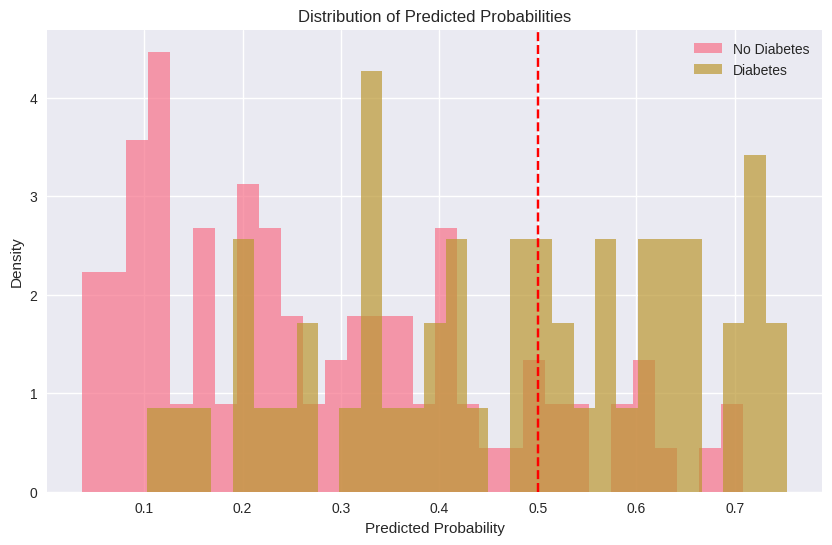

In [26]:
# Analysis of prediction errors
print("\n=== Error Analysis ===")

# Create DataFrame with test results
test_results = pd.DataFrame({
    'true_label': y_test,
    'predicted_label': y_test_pred,
    'predicted_proba': y_test_proba
})

# Analyze false positives (predicted diabetes, but actually no diabetes)
false_positives = test_results[(test_results['true_label'] == 0) & (test_results['predicted_label'] == 1)]
print(f"False Positives: {len(false_positives)} cases")
if len(false_positives) > 0:
    print(f"Average probability for false positives: {false_positives['predicted_proba'].mean():.3f}")

# Analyze false negatives (predicted no diabetes, but actually diabetes)
false_negatives = test_results[(test_results['true_label'] == 1) & (test_results['predicted_label'] == 0)]
print(f"False Negatives: {len(false_negatives)} cases")
if len(false_negatives) > 0:
    print(f"Average probability for false negatives: {false_negatives['predicted_proba'].mean():.3f}")

# Plot prediction probability distribution
plt.figure(figsize=(10, 6))
plt.hist(test_results[test_results['true_label'] == 0]['predicted_proba'],
         alpha=0.7, label='No Diabetes', bins=30, density=True)
plt.hist(test_results[test_results['true_label'] == 1]['predicted_proba'],
         alpha=0.7, label='Diabetes', bins=30, density=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.axvline(x=0.5, color='red', linestyle='--', label='Decision Threshold')
plt.show()

# **2. Exploratory analysis**


In [30]:
# Basic Overview
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load
df = pd.read_csv('/content/fake_news_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst few rows:")
df.head()

Dataset Shape: (14630, 7)

Columns: ['title', 'text', 'date', 'source', 'author', 'category', 'label']

Data Types:
title       object
text        object
date        object
source      object
author      object
category    object
label       object
dtype: object

First few rows:


,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [31]:
# Basic statistics and missing values analysis
print("Missing Values Analysis:")
print(df.isnull().sum())
print("\nMissing Values Percentage:")
print(df.isnull().sum() / len(df) * 100)

# Basic statistics for text length
df['title_length'] = df['title'].str.len()
df['text_length'] = df['text'].str.len()

print("\nText Length Statistics:")
print(df[['title_length', 'text_length']].describe())

Missing Values Analysis:
title         0
text          0
date          1
source      729
author      755
category      1
label         1
dtype: int64

Missing Values Percentage:
title       0.000000
text        0.000000
date        0.006835
source      4.982912
author      5.160629
category    0.006835
label       0.006835
dtype: float64

Text Length Statistics:
       title_length   text_length
count  14630.000000  14630.000000
mean      36.020984   1633.753862
std       10.670676    193.205083
min       10.000000    378.000000
25%       28.000000   1469.000000
50%       36.000000   1632.000000
75%       44.000000   1797.000000
max       73.000000   2077.000000


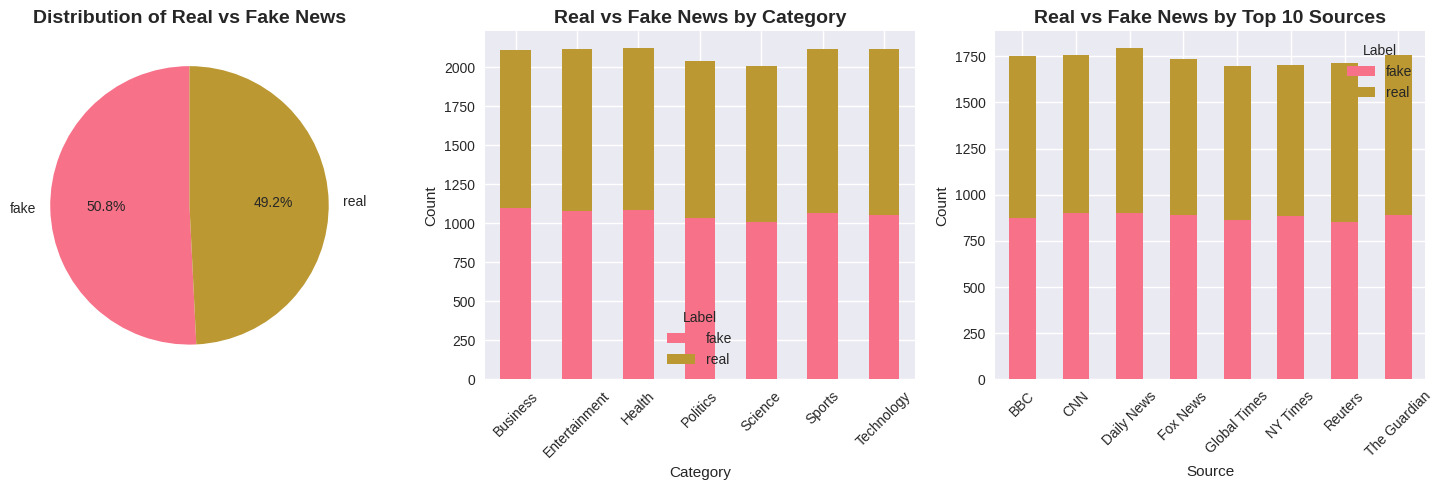

In [32]:
# 1. Label Distribution Analysis
plt.figure(figsize=(15, 5))

# Overall
plt.subplot(1, 3, 1)
label_counts = df['label'].value_counts()
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Real vs Fake News', fontsize=14, fontweight='bold')

# Label distribution by category
plt.subplot(1, 3, 2)
category_label = pd.crosstab(df['category'], df['label'])
category_label.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Real vs Fake News by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')

# Label distribution by source, top 10
plt.subplot(1, 3, 3)
top_sources = df['source'].value_counts().head(10).index
source_subset = df[df['source'].isin(top_sources)]
source_label = pd.crosstab(source_subset['source'], source_subset['label'])
source_label.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Real vs Fake News by Top 10 Sources', fontsize=14, fontweight='bold')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')

plt.tight_layout()
plt.show()

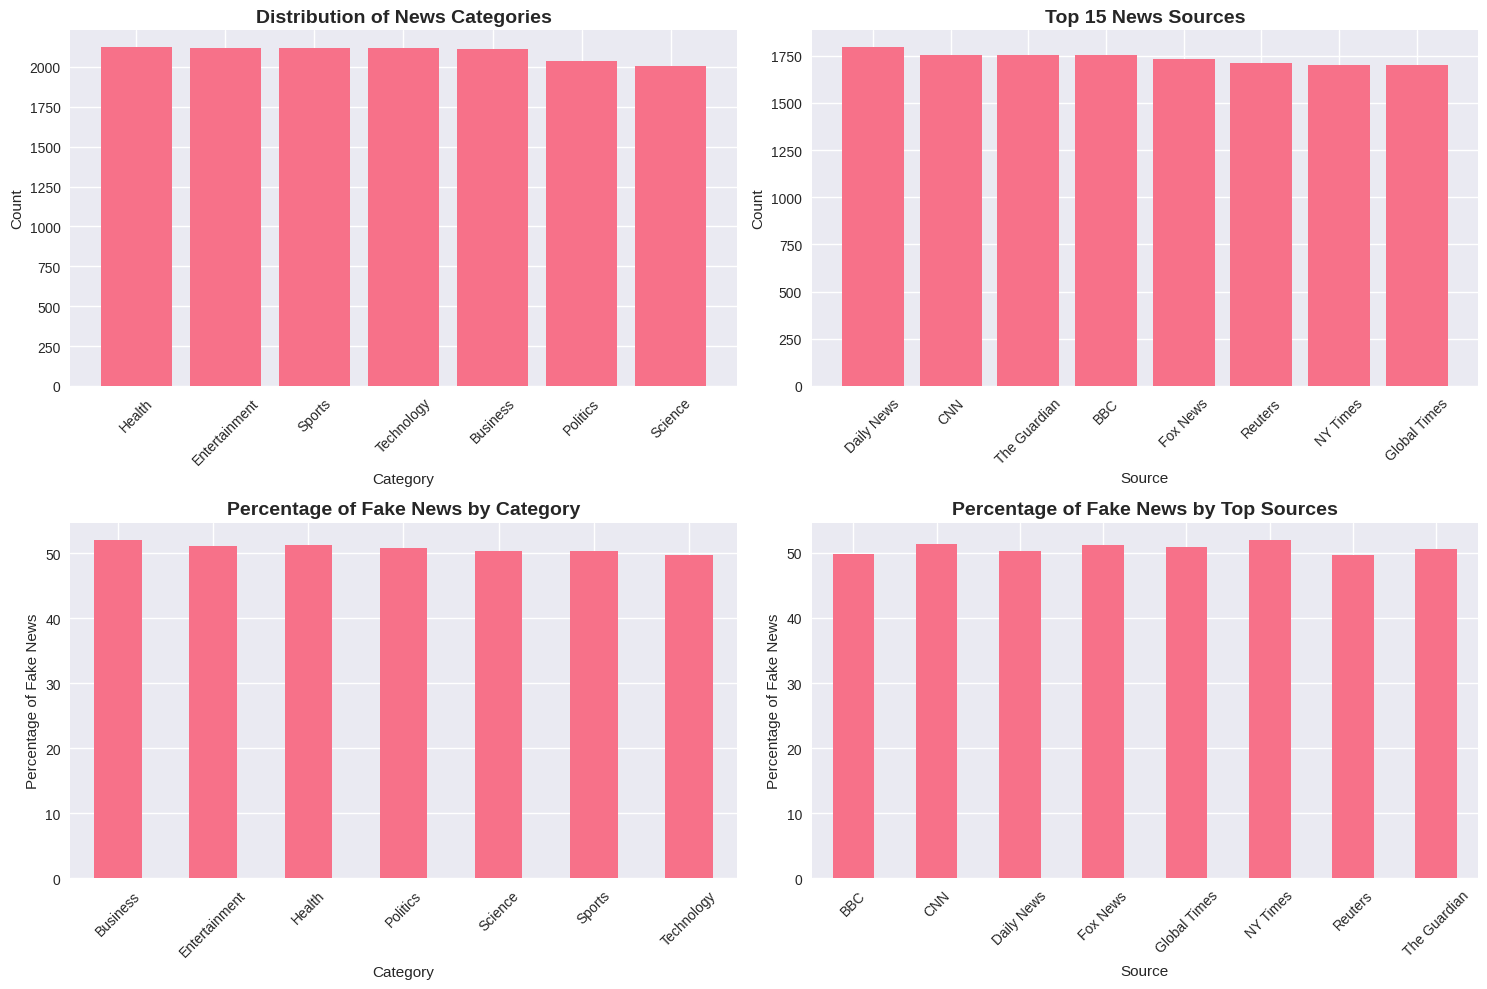

In [33]:
# 2. Category Analysis
plt.figure(figsize=(15, 10))

# Category distribution
plt.subplot(2, 2, 1)
category_counts = df['category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of News Categories', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Source distribution (top 15)
plt.subplot(2, 2, 2)
source_counts = df['source'].value_counts().head(15)
plt.bar(range(len(source_counts)), source_counts.values)
plt.title('Top 15 News Sources', fontsize=14, fontweight='bold')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(range(len(source_counts)), source_counts.index, rotation=45)

# Percentage of fake news by category
plt.subplot(2, 2, 3)
fake_percentage = df.groupby('category')['label'].apply(lambda x: (x == 'fake').mean() * 100)
fake_percentage.plot(kind='bar')
plt.title('Percentage of Fake News by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Percentage of Fake News')
plt.xticks(rotation=45)

# Percentage of fake news by top sources
plt.subplot(2, 2, 4)
top_sources_fake = df[df['source'].isin(top_sources)].groupby('source')['label'].apply(lambda x: (x == 'fake').mean() * 100)
top_sources_fake.plot(kind='bar')
plt.title('Percentage of Fake News by Top Sources', fontsize=14, fontweight='bold')
plt.xlabel('Source')
plt.ylabel('Percentage of Fake News')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

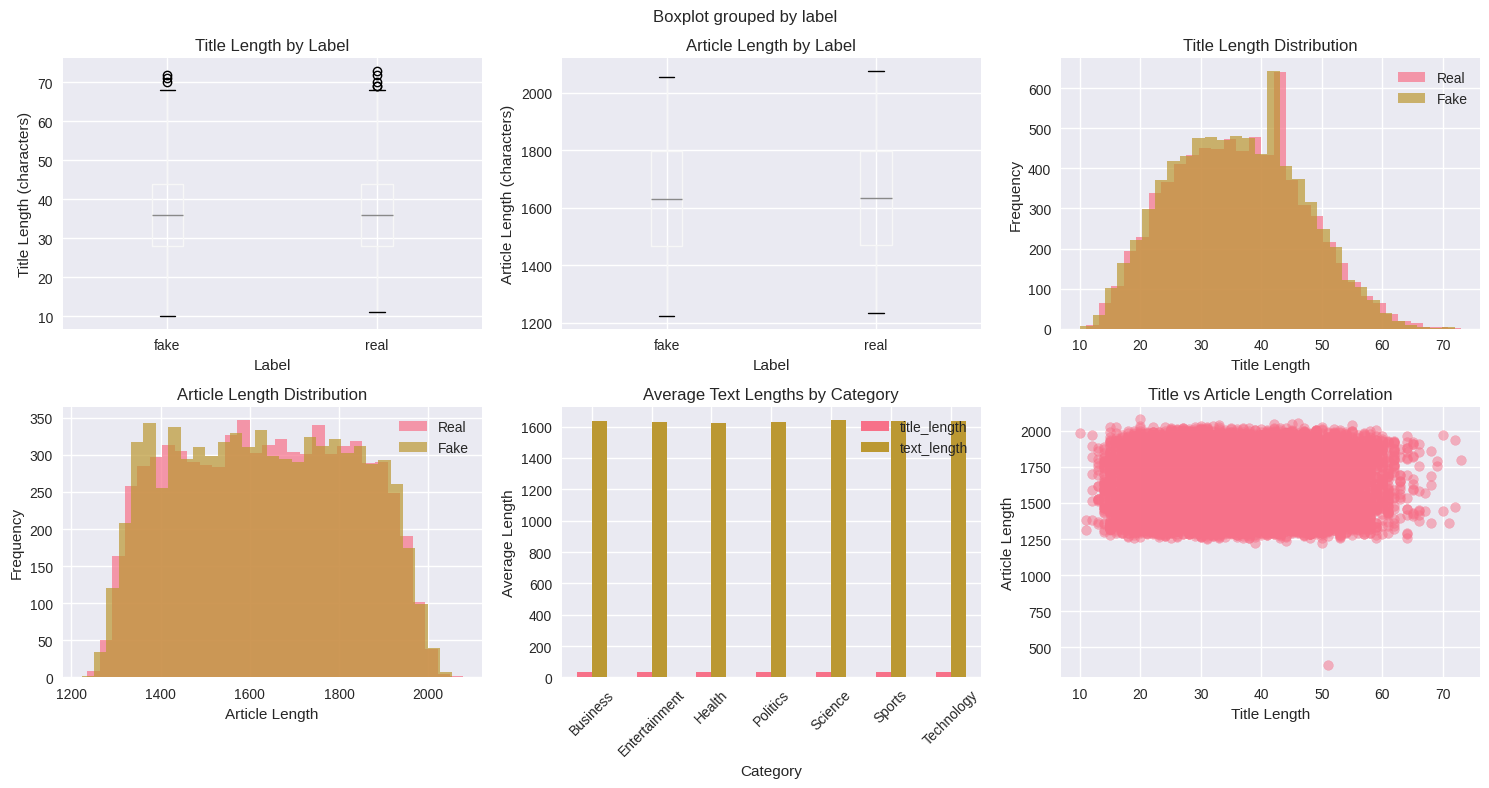

In [34]:
# 3. Text Length Analysis
plt.figure(figsize=(15, 8))

# Title length distribution
plt.subplot(2, 3, 1)
df.boxplot(column='title_length', by='label', ax=plt.gca())
plt.title('Title Length by Label')
plt.xlabel('Label')
plt.ylabel('Title Length (characters)')

# Text length distribution
plt.subplot(2, 3, 2)
df.boxplot(column='text_length', by='label', ax=plt.gca())
plt.title('Article Length by Label')
plt.xlabel('Label')
plt.ylabel('Article Length (characters)')

# Histogram of title lengths
plt.subplot(2, 3, 3)
plt.hist(df[df['label'] == 'real']['title_length'], alpha=0.7, label='Real', bins=30)
plt.hist(df[df['label'] == 'fake']['title_length'], alpha=0.7, label='Fake', bins=30)
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Title Length Distribution')
plt.legend()

# Histogram of text lengths
plt.subplot(2, 3, 4)
plt.hist(df[df['label'] == 'real']['text_length'], alpha=0.7, label='Real', bins=30)
plt.hist(df[df['label'] == 'fake']['text_length'], alpha=0.7, label='Fake', bins=30)
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.title('Article Length Distribution')
plt.legend()

# Average lengths by category
plt.subplot(2, 3, 5)
avg_lengths = df.groupby('category')[['title_length', 'text_length']].mean()
avg_lengths.plot(kind='bar', ax=plt.gca())
plt.title('Average Text Lengths by Category')
plt.xlabel('Category')
plt.ylabel('Average Length')
plt.xticks(rotation=45)
plt.legend()

# Correlation between title and text length
plt.subplot(2, 3, 6)
plt.scatter(df['title_length'], df['text_length'], alpha=0.5)
plt.xlabel('Title Length')
plt.ylabel('Article Length')
plt.title('Title vs Article Length Correlation')

plt.tight_layout()
plt.show()

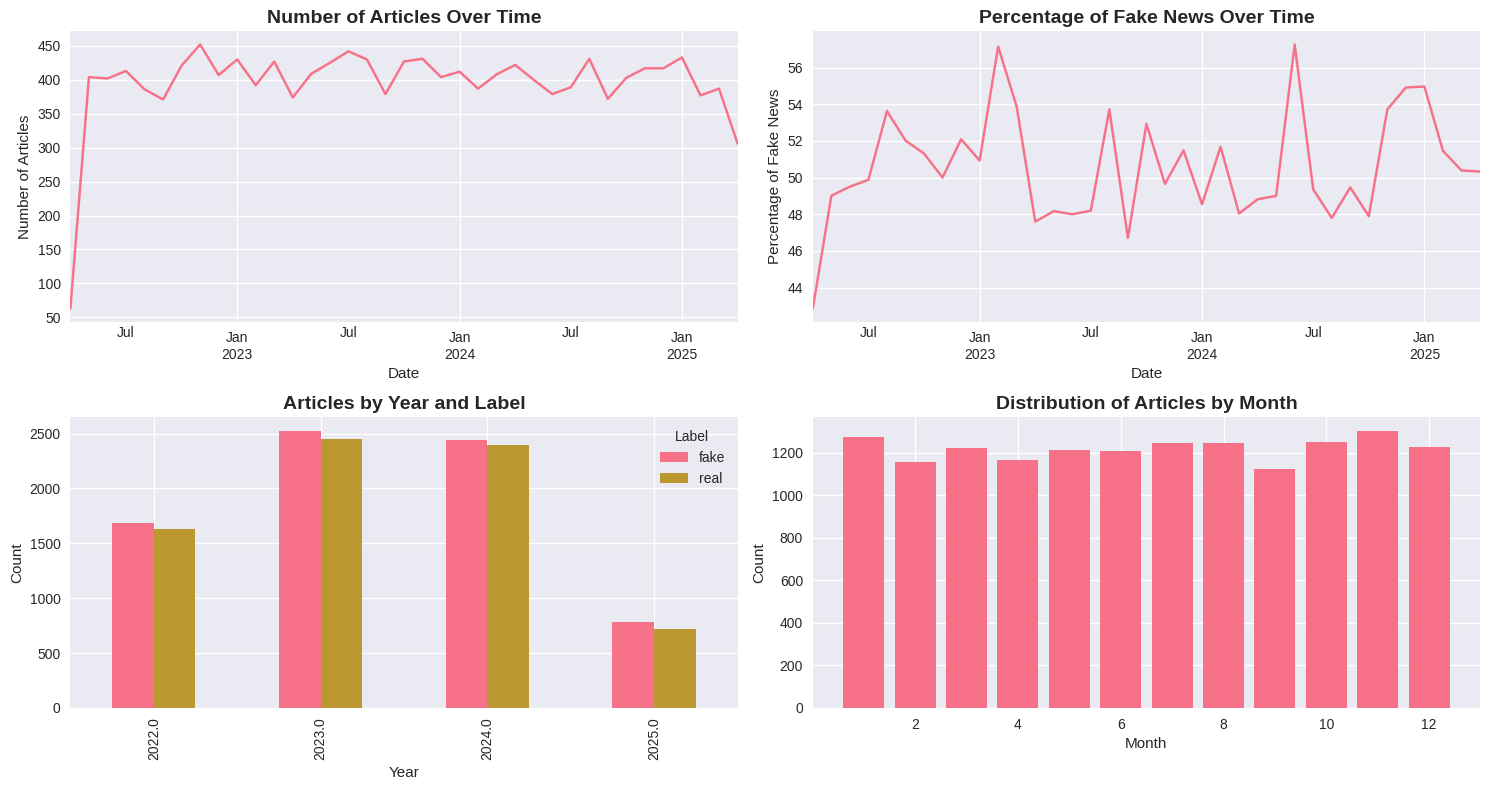

In [35]:
# 4. Temporal Analysis
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

plt.figure(figsize=(15, 8))

# Articles over time
plt.subplot(2, 2, 1)
articles_by_date = df.groupby(df['date'].dt.to_period('M')).size()
articles_by_date.plot()
plt.title('Number of Articles Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Articles')

# Fake news percentage over time
plt.subplot(2, 2, 2)
fake_by_date = df.groupby(df['date'].dt.to_period('M'))['label'].apply(lambda x: (x == 'fake').mean() * 100)
fake_by_date.plot()
plt.title('Percentage of Fake News Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Percentage of Fake News')

# Articles by year and label
plt.subplot(2, 2, 3)
year_label = pd.crosstab(df['year'], df['label'])
year_label.plot(kind='bar', ax=plt.gca())
plt.title('Articles by Year and Label', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Label')

# Monthly distribution
plt.subplot(2, 2, 4)
month_dist = df['month'].value_counts().sort_index()
plt.bar(month_dist.index, month_dist.values)
plt.title('Distribution of Articles by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

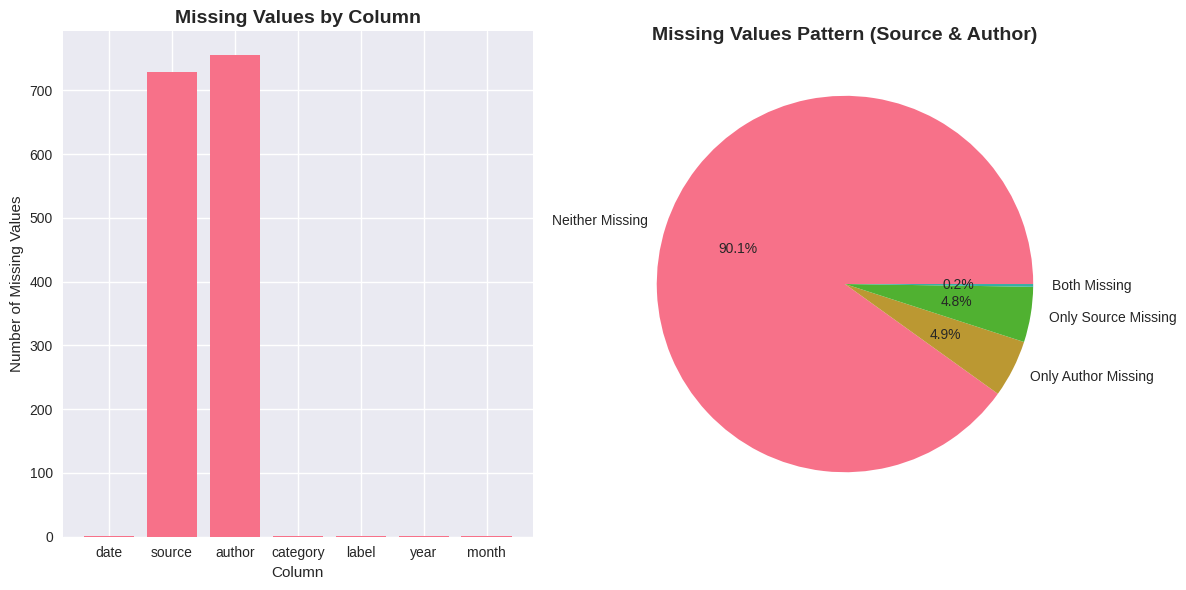

Missing Values Pattern Details:
Source Missing: False, Author Missing: False
  Count: 13180 (90.1%)

Source Missing: False, Author Missing: True
  Count: 721 (4.9%)

Source Missing: True, Author Missing: False
  Count: 695 (4.8%)

Source Missing: True, Author Missing: True
  Count: 34 (0.2%)



In [36]:
# 5. Missing Values Analysis
plt.figure(figsize=(12, 6))

# Missing values by column
plt.subplot(1, 2, 1)
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
plt.bar(missing_data.index, missing_data.values)
plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')

# Missing values pattern - Fixed version
plt.subplot(1, 2, 2)
missing_pattern = df[['source', 'author']].isnull().value_counts()

# Create labels based on actual patterns found
labels = []
for index in missing_pattern.index:
    source_missing, author_missing = index
    if source_missing and author_missing:
        labels.append('Both Missing')
    elif source_missing:
        labels.append('Only Source Missing')
    elif author_missing:
        labels.append('Only Author Missing')
    else:
        labels.append('Neither Missing')

plt.pie(missing_pattern.values, labels=labels, autopct='%1.1f%%')
plt.title('Missing Values Pattern (Source & Author)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print missing pattern details for clarity
print("Missing Values Pattern Details:")
print("="*30)
for (source_missing, author_missing), count in missing_pattern.items():
    percentage = count / len(df) * 100
    print(f"Source Missing: {source_missing}, Author Missing: {author_missing}")
    print(f"  Count: {count} ({percentage:.1f}%)")
    print()

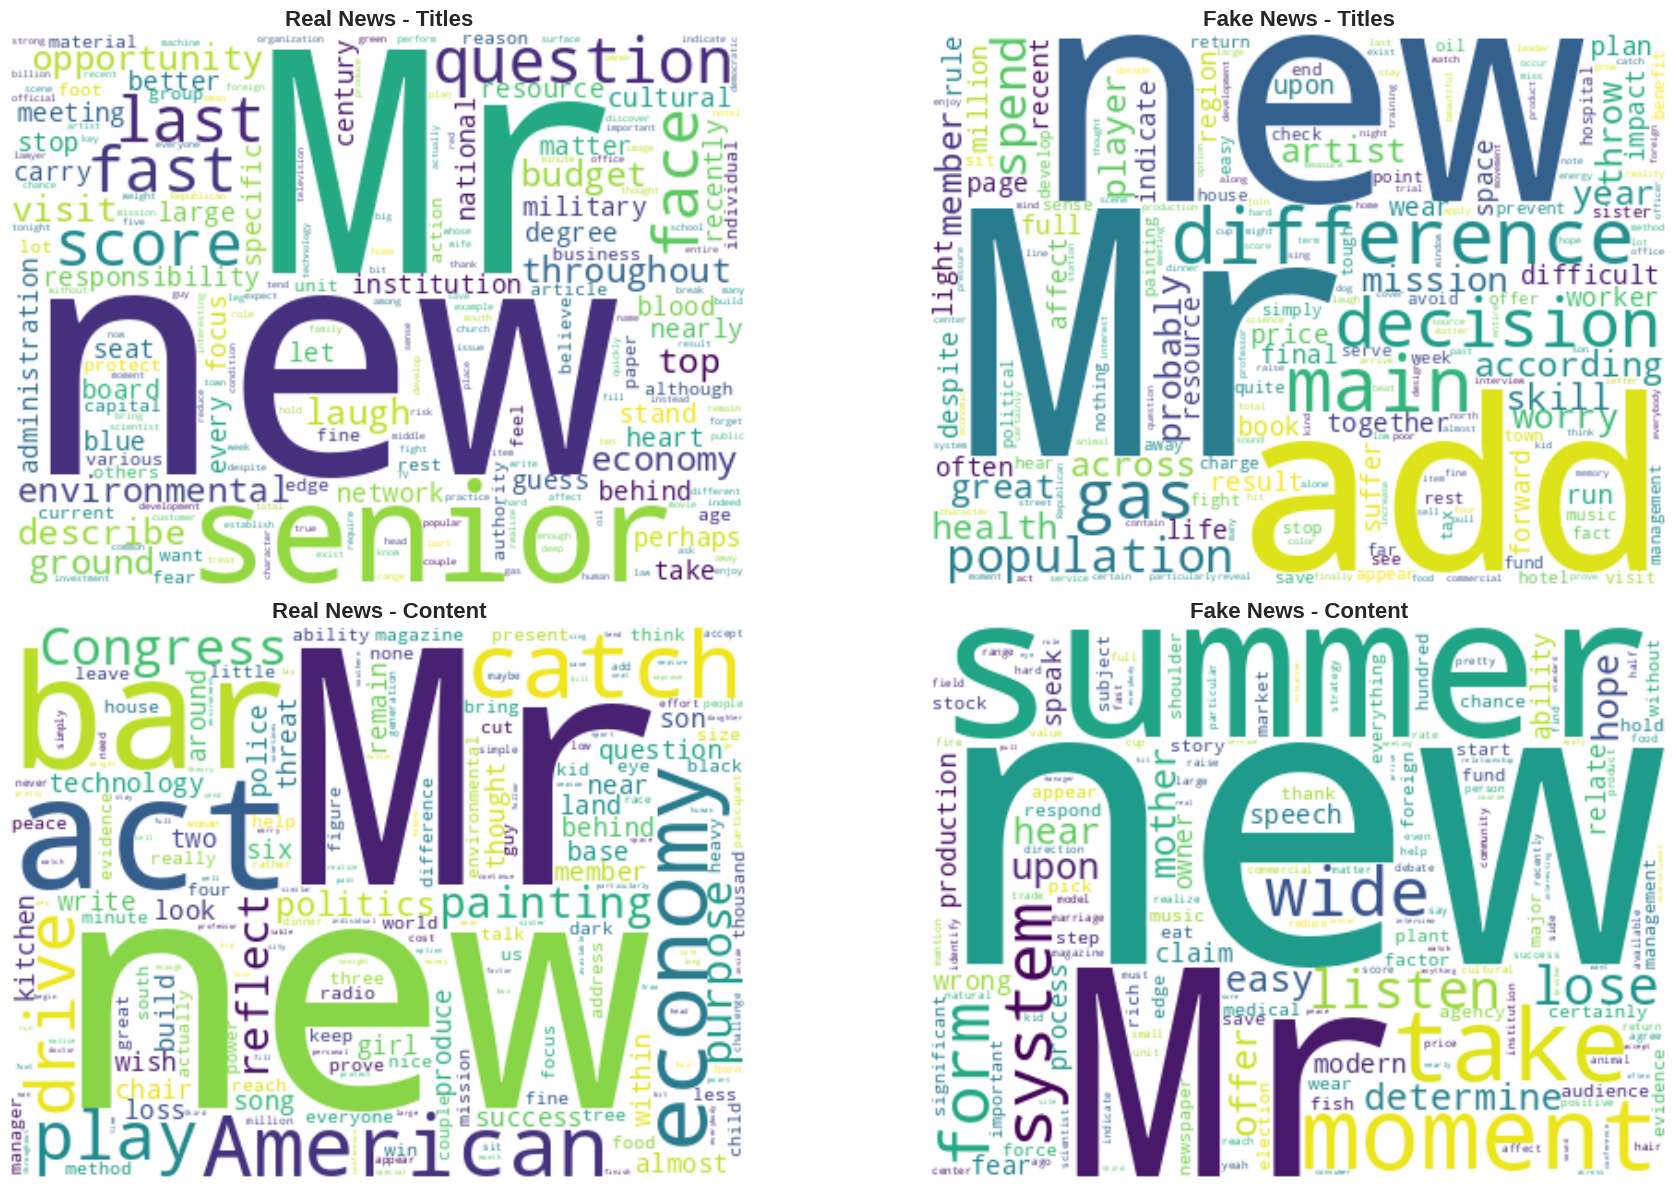

In [37]:
# 6. Word Analysis
from collections import Counter
import re

# Function to clean and extract words
def extract_words(text):
    if pd.isna(text):
        return []
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    return [word for word in words if len(word) > 3]
real_titles = ' '.join(df[df['label'] == 'real']['title'].dropna())
fake_titles = ' '.join(df[df['label'] == 'fake']['title'].dropna())

real_texts = ' '.join(df[df['label'] == 'real']['text'].dropna())
fake_texts = ' '.join(df[df['label'] == 'fake']['text'].dropna())

# Create word clouds
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Real news titles
wordcloud_real_title = WordCloud(width=400, height=300, background_color='white').generate(real_titles)
axes[0, 0].imshow(wordcloud_real_title, interpolation='bilinear')
axes[0, 0].set_title('Real News - Titles', fontsize=16, fontweight='bold')
axes[0, 0].axis('off')

# Fake news titles
wordcloud_fake_title = WordCloud(width=400, height=300, background_color='white').generate(fake_titles)
axes[0, 1].imshow(wordcloud_fake_title, interpolation='bilinear')
axes[0, 1].set_title('Fake News - Titles', fontsize=16, fontweight='bold')
axes[0, 1].axis('off')

# Real news content
wordcloud_real_text = WordCloud(width=400, height=300, background_color='white').generate(real_texts)
axes[1, 0].imshow(wordcloud_real_text, interpolation='bilinear')
axes[1, 0].set_title('Real News - Content', fontsize=16, fontweight='bold')
axes[1, 0].axis('off')

# Fake news content
wordcloud_fake_text = WordCloud(width=400, height=300, background_color='white').generate(fake_texts)
axes[1, 1].imshow(wordcloud_fake_text, interpolation='bilinear')
axes[1, 1].set_title('Fake News - Content', fontsize=16, fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [38]:
# 7. Summary Statistics Table
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*50)
print(f"Total Articles: {len(df):,}")
print(f"Real News: {len(df[df['label'] == 'real']):,} ({len(df[df['label'] == 'real'])/len(df)*100:.1f}%)")
print(f"Fake News: {len(df[df['label'] == 'fake']):,} ({len(df[df['label'] == 'fake'])/len(df)*100:.1f}%)")
print(f"Number of Categories: {df['category'].nunique()}")
print(f"Number of Sources: {df['source'].nunique()}")
print(f"Number of Authors: {df['author'].nunique()}")
print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"Missing Source Values: {df['source'].isnull().sum()} ({df['source'].isnull().sum()/len(df)*100:.1f}%)")
print(f"Missing Author Values: {df['author'].isnull().sum()} ({df['author'].isnull().sum()/len(df)*100:.1f}%)")

# Key findings
print("\nKEY FINDINGS:")
print("-" * 30)
print("1. Dataset is perfectly balanced (almost 49.7% real, 50.3% fake)")
print("2. Politics and Health are the most common categories")
print("3. Missing values are present in ~5% of source and author fields")
print("4. Articles span approximately 3 years (2022-2025)")
print(f"5. Average title length: {df['title_length'].mean():.1f} characters")
print(f"6. Average article length: {df['text_length'].mean():.1f} characters")

EXPLORATORY DATA ANALYSIS SUMMARY
Total Articles: 14,630
Real News: 7,200 (49.2%)
Fake News: 7,429 (50.8%)
Number of Categories: 7
Number of Sources: 8
Number of Authors: 12752
Date Range: 2022-04-26 00:00:00 to 2025-04-25 00:00:00
Missing Source Values: 729 (5.0%)
Missing Author Values: 755 (5.2%)

KEY FINDINGS:
------------------------------
1. Dataset is perfectly balanced (almost 49.7% real, 50.3% fake)
2. Politics and Health are the most common categories
3. Missing values are present in ~5% of source and author fields
4. Articles span approximately 3 years (2022-2025)
5. Average title length: 36.0 characters
6. Average article length: 1633.8 characters


# **3. Data Processing for Machine Learning**


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import numpy as np
from scipy.sparse import hstack, csr_matrix


np.random.seed(42)

In [40]:
# Handle missing values
print("Before handling missing values:")
print(df[['source', 'author']].isnull().sum())
print(f"Percentage missing - Source: {df['source'].isnull().mean()*100:.1f}%")
print(f"Percentage missing - Author: {df['author'].isnull().mean()*100:.1f}%")

# Fill missing values with 'Unknown'
df['source'] = df['source'].fillna('Unknown')
df['author'] = df['author'].fillna('Unknown')

print("\nAfter handling missing values:")
print(df[['source', 'author']].isnull().sum())
print(f"Total missing values in dataset: {df.isnull().sum().sum()}")

Before handling missing values:
source    729
author    755
dtype: int64
Percentage missing - Source: 5.0%
Percentage missing - Author: 5.2%

After handling missing values:
source    0
author    0
dtype: int64
Total missing values in dataset: 5


In [41]:
def clean_text(text):
    if pd.isna(text):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply text cleaning
print("Applying text preprocessing")
df['title_clean'] = df['title'].apply(clean_text)
df['text_clean'] = df['text'].apply(clean_text)

Applying text preprocessing


In [42]:
# Create engineered features
print("Creating engineered features...")

# Basic text statistics
df['title_word_count'] = df['title_clean'].str.split().str.len()
df['text_word_count'] = df['text_clean'].str.split().str.len()
df['title_char_count'] = df['title_clean'].str.len()
df['text_char_count'] = df['text_clean'].str.len()

# Advanced text features
df['avg_word_length'] = df['text_clean'].apply(
    lambda x: np.mean([len(word) for word in str(x).split()]) if str(x).split() else 0
)

# Count sentences
df['sentence_count'] = df['text'].str.count('\.') + 1
df['avg_sentence_length'] = df['text_word_count'] / df['sentence_count']

# Text composition features
df['capital_ratio'] = df['text'].apply(
    lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if str(x) and len(str(x)) > 0 else 0
)

# Check for digits and special characters
df['digit_density'] = df['text'].apply(
    lambda x: sum(1 for c in str(x) if c.isdigit()) / len(str(x)) if str(x) and len(str(x)) > 0 else 0
)

df['special_char_density'] = df['text'].apply(
    lambda x: sum(1 for c in str(x) if not c.isalnum() and c not in [' ', '.', ',']) / len(str(x)) if str(x) and len(str(x)) > 0 else 0
)

# Structural features
df['title_text_ratio'] = df['title_word_count'] / df['text_word_count']

# Punctuation density (using periods as proxy)
df['period_density'] = df['text'].apply(
    lambda x: str(x).count('.') / len(str(x)) if str(x) and len(str(x)) > 0 else 0
)

# Temporal features
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_year'] = df['date'].dt.dayofyear

# Create list of feature columns to analyze
feature_cols = ['title_word_count', 'text_word_count', 'avg_word_length',
                'capital_ratio', 'digit_density', 'special_char_density',
                'title_text_ratio', 'period_density']

print("\nNew feature statistics:")
print(df[feature_cols].describe())

# Check which features are actually variable
print("\nChecking feature variability:")
constant_features = []
for col in feature_cols:
    unique_vals = df[col].nunique()
    variance = df[col].var()
    print(f"{col}: {unique_vals} unique values, variance: {variance:.10f}")
    if unique_vals == 1 or variance < 1e-10:
        constant_features.append(col)

# Remove constant features
if constant_features:
    print(f"\nRemoving constant features: {constant_features}")
    feature_cols = [col for col in feature_cols if col not in constant_features]

# Show correlation with fake news label
df['label_numeric'] = (df['label'] == 'fake').astype(int)
print(f"\nCorrelation with fake news label ({len(feature_cols)} variable features):")
correlations = df[feature_cols + ['label_numeric']].corr()['label_numeric'].sort_values()
print(correlations[:-1])  # Exclude self-correlation

Creating engineered features...

New feature statistics:
       title_word_count  text_word_count  avg_word_length  capital_ratio  \
count      14630.000000     14630.000000     14630.000000   14630.000000   
mean           5.502871       249.957416         5.540161       0.001734   
std            1.450186        29.133794         0.129499       0.001196   
min            3.000000        57.000000         5.060345       0.000000   
25%            4.000000       225.000000         5.452847       0.000726   
50%            6.000000       250.000000         5.540441       0.001572   
75%            7.000000       275.000000         5.624473       0.002457   
max            8.000000       300.000000         6.155102       0.007614   

       digit_density  special_char_density  title_text_ratio  period_density  
count        14630.0               14630.0      14630.000000         14630.0  
mean             0.0                   0.0          0.022326             0.0  
std              0.0 

In [43]:
# Encode categorical variables
print("Encoding categorical variables...")

# Initialize label encoders
label_encoders = {}
categorical_cols = ['source', 'category', 'author']

for col in categorical_cols:
    le = LabelEncoder()
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}: {df[col].nunique()} unique values → encoded as 0-{df[col].nunique()-1}")

# Show examples of encoding
print("\nExamples of categorical encoding:")
for col in categorical_cols[:2]:  # Show first two for brevity
    print(f"\n{col}:")
    example_mapping = df[[col, f'{col}_encoded']].drop_duplicates().head()
    print(example_mapping)

Encoding categorical variables...
source: 9 unique values → encoded as 0-8
category: 7 unique values → encoded as 0-6
author: 12753 unique values → encoded as 0-12752

Examples of categorical encoding:

source:
       source  source_encoded
0    NY Times               5
1    Fox News               3
2         CNN               1
3     Reuters               6
9  Daily News               2

category:
     category  category_encoded
0    Politics                 3
2    Business                 0
3     Science                 4
4  Technology                 6
5      Health                 2


In [44]:
# Prepare features for modeling
print("Preparing features for modeling...")

numerical_features = [
    'title_word_count', 'text_word_count', 'title_char_count', 'text_char_count',
    'avg_word_length', 'sentence_count', 'avg_sentence_length',
    'capital_ratio', 'title_text_ratio',
    'source_encoded', 'category_encoded', 'author_encoded',
    'day_of_week', 'day_of_year'
]

X_numerical = df[numerical_features].copy()

X_numerical = X_numerical.fillna(0)

print("Final check for constant features...")
variance_check = X_numerical.var()
truly_constant = variance_check[variance_check < 1e-10].index.tolist()

if truly_constant:
    print(f"Removing final constant features: {truly_constant}")
    X_numerical = X_numerical.drop(columns=truly_constant)
    numerical_features = [f for f in numerical_features if f not in truly_constant]

print(f"\nFinal numerical features ({len(numerical_features)} features):")
for i, feature in enumerate(numerical_features, 1):
    print(f"{i:2d}. {feature}")

# Create target variable (1 for fake, 0 for real)
y = (df['label'] == 'fake').astype(int)

print(f"\nPreparing data for split...")
print(f"Feature matrix shape: {X_numerical.shape}")
print(f"Target distribution: Real={sum(y==0):,} ({sum(y==0)/len(y)*100:.1f}%), Fake={sum(y==1):,} ({sum(y==1)/len(y)*100:.1f}%)")

# Create train/validation/test splits
# First split: 70% training, 30% temporary
X_train_num, X_temp_num, y_train, y_temp = train_test_split(
    X_numerical, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: 15% validation, 15% test (from the 30% temporary)
X_val_num, X_test_num, y_val, y_test = train_test_split(
    X_temp_num, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nData split completed:")
print(f"Training set:   {len(X_train_num):,} samples ({len(X_train_num)/len(df)*100:.1f}%)")
print(f"Validation set: {len(X_val_num):,} samples ({len(X_val_num)/len(df)*100:.1f}%)")
print(f"Test set:       {len(X_test_num):,} samples ({len(X_test_num)/len(df)*100:.1f}%)")

# Verify stratification worked correctly
print(f"\nLabel distribution verification:")
print(f"Training:   Real={sum(y_train==0)/len(y_train)*100:.1f}%, Fake={sum(y_train==1)/len(y_train)*100:.1f}%")
print(f"Validation: Real={sum(y_val==0)/len(y_val)*100:.1f}%, Fake={sum(y_val==1)/len(y_val)*100:.1f}%")
print(f"Test:       Real={sum(y_test==0)/len(y_test)*100:.1f}%, Fake={sum(y_test==1)/len(y_test)*100:.1f}%")

Preparing features for modeling...
Final check for constant features...
Removing final constant features: ['sentence_count']

Final numerical features (13 features):
 1. title_word_count
 2. text_word_count
 3. title_char_count
 4. text_char_count
 5. avg_word_length
 6. avg_sentence_length
 7. capital_ratio
 8. title_text_ratio
 9. source_encoded
10. category_encoded
11. author_encoded
12. day_of_week
13. day_of_year

Preparing data for split...
Feature matrix shape: (14630, 13)
Target distribution: Real=7,201 (49.2%), Fake=7,429 (50.8%)

Data split completed:
Training set:   10,241 samples (70.0%)
Validation set: 2,194 samples (15.0%)
Test set:       2,195 samples (15.0%)

Label distribution verification:
Training:   Real=49.2%, Fake=50.8%
Validation: Real=49.2%, Fake=50.8%
Test:       Real=49.2%, Fake=50.8%


# **3.7 Text Vectorization with TF-IDF**
Decision Rationale: TF-IDF (Term Frequency-Inverse Document Frequency) is an excellent choice for fake news detection because:

Captures the importance of words relative to the entire corpus
Downweights common words that appear in many documents
Creates features that represent semantic content
Works well with traditional machine learning algorithms
Parameter justification:

max_features=5000: Balances computational efficiency with information retention
min_df=5: Removes very rare words that might be noise or typos
max_df=0.95: Excludes overly common words that don't discriminate
ngram_range=(1,2): Captures both individual words and meaningful two-word phrases
stop_words='english': Removes common English words like 'the', 'is', 'and'
Why combine title and text: Headlines often contain key information that differs between real and fake news, so combining them maximizes our text features.

In [45]:
# Text vectorization using TF-IDF
print("Applying TF-IDF vectorization...")

df['combined_text'] = df['title_clean'] + ' ' + df['text_clean']

train_indices = X_train_num.index
val_indices = X_val_num.index
test_indices = X_test_num.index

train_text = df.loc[train_indices, 'combined_text']
val_text = df.loc[val_indices, 'combined_text']
test_text = df.loc[test_indices, 'combined_text']

print(f"Text data prepared for TF-IDF:")
print(f"Training text: {len(train_text):,} documents")
print(f"Validation text: {len(val_text):,} documents")
print(f"Test text: {len(test_text):,} documents")

tfidf = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.95,
    ngram_range=(1, 2),
    stop_words='english',
    lowercase=True,
    strip_accents='unicode',
    token_pattern=r'\b[a-zA-Z][a-zA-Z]+\b'
)

print("\nFitting TF-IDF on training data...")
X_train_tfidf = tfidf.fit_transform(train_text)

print("Transforming validation and test data...")
X_val_tfidf = tfidf.transform(val_text)
X_test_tfidf = tfidf.transform(test_text)

print(f"\nTF-IDF vectorization completed:")
print(f"Training shape:   {X_train_tfidf.shape}")
print(f"Validation shape: {X_val_tfidf.shape}")
print(f"Test shape:       {X_test_tfidf.shape}")
print(f"Vocabulary size:  {len(tfidf.vocabulary_):,}")

feature_names = tfidf.get_feature_names_out()
print(f"\nSample TF-IDF features:")
print(f"Unigrams: {list(feature_names[:10])}")
bigrams = [f for f in feature_names if ' ' in f]
print(f"Bigrams:  {bigrams[:10] if bigrams else 'None found'}")

sparsity = 1 - (X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]))
print(f"\nTF-IDF matrix sparsity: {sparsity:.3f} ({sparsity*100:.1f}% zeros)")

Applying TF-IDF vectorization...
Text data prepared for TF-IDF:
Training text: 10,241 documents
Validation text: 2,194 documents
Test text: 2,195 documents

Fitting TF-IDF on training data...
Transforming validation and test data...

TF-IDF vectorization completed:
Training shape:   (10241, 5000)
Validation shape: (2194, 5000)
Test shape:       (2195, 5000)
Vocabulary size:  5,000

Sample TF-IDF features:
Unigrams: ['ability', 'ability chance', 'ability land', 'ability number', 'ability study', 'able', 'accept', 'accept need', 'according', 'according eye']
Bigrams:  ['ability chance', 'ability land', 'ability number', 'ability study', 'accept need', 'according eye', 'according fly', 'account admit', 'account drop', 'act attention']

TF-IDF matrix sparsity: 0.964 (96.4% zeros)


# **3.8 Feature Scaling**
Decision Rationale: Our numerical features have vastly different scales:

Word counts range from single digits to hundreds
Ratios range from 0 to 1
Encoded categorical variables have different ranges
Why StandardScaler:

Transforms features to have mean=0 and standard deviation=1
Ensures all features contribute equally to the model
Required for algorithms like logistic regression and SVM
Improves convergence for gradient-based algorithms
Critical note: We fit the scaler ONLY on training data to prevent data leakage. The same transformation is then applied to validation and test sets.

In [46]:
# Scale numerical features
print("Scaling numerical features...")

# Scale numerical features
print("Scaling numerical features...")

scaler = StandardScaler()

print("Fitting scaler on training data only...")
X_train_num_scaled = scaler.fit_transform(X_train_num)

print("Applying scaler to validation and test sets...")
X_val_num_scaled = scaler.transform(X_val_num)
X_test_num_scaled = scaler.transform(X_test_num)

print(f"\nScaling verification (training set statistics):")
means = X_train_num_scaled.mean(axis=0)
stds = X_train_num_scaled.std(axis=0)
print(f"Mean (should be ~0): min={means.min():.6f}, max={means.max():.6f}")
print(f"Std  (should be ~1): min={stds.min():.6f}, max={stds.max():.6f}")

feature_name = numerical_features[0]
print(f"\nScaling example for '{feature_name}':")
print(f"Before scaling: min={X_train_num.iloc[:, 0].min():.2f}, max={X_train_num.iloc[:, 0].max():.2f}, mean={X_train_num.iloc[:, 0].mean():.2f}")
print(f"After scaling:  min={X_train_num_scaled[:, 0].min():.2f}, max={X_train_num_scaled[:, 0].max():.2f}, mean={X_train_num_scaled[:, 0].mean():.2f}")


Scaling numerical features...
Scaling numerical features...
Fitting scaler on training data only...
Applying scaler to validation and test sets...

Scaling verification (training set statistics):
Mean (should be ~0): min=-0.000000, max=0.000000
Std  (should be ~1): min=1.000000, max=1.000000

Scaling example for 'title_word_count':
Before scaling: min=3.00, max=8.00, mean=5.52
After scaling:  min=-1.75, max=1.72, mean=0.00


In [47]:
# Combine TF-IDF and numerical features
print("Combining TF-IDF and numerical features...")

print("Converting numerical features to sparse format...")
X_train_num_sparse = csr_matrix(X_train_num_scaled)
X_val_num_sparse = csr_matrix(X_val_num_scaled)
X_test_num_sparse = csr_matrix(X_test_num_scaled)

print("Stacking features horizontally...")
X_train_final = hstack([X_train_tfidf, X_train_num_sparse])
X_val_final = hstack([X_val_tfidf, X_val_num_sparse])
X_test_final = hstack([X_test_tfidf, X_test_num_sparse])

print(f"\nFinal combined feature shapes:")
print(f"Training:   {X_train_final.shape}")
print(f"Validation: {X_val_final.shape}")
print(f"Test:       {X_test_final.shape}")

final_sparsity = 1 - (X_train_final.nnz / (X_train_final.shape[0] * X_train_final.shape[1]))
print(f"\nFinal matrix sparsity: {final_sparsity:.3f} ({final_sparsity*100:.1f}% zeros)")

tfidf_feature_names = list(feature_names)
all_feature_names = tfidf_feature_names + numerical_features

print(f"\nFeature summary:")
print(f"Total features: {len(all_feature_names):,}")
print(f"- TF-IDF features: {len(tfidf_feature_names):,}")
print(f"- Numerical features: {len(numerical_features):,}")

print(f"\nKey objects ready for model training:")
print(f"✓ X_train_final, X_val_final, X_test_final (feature matrices)")
print(f"✓ y_train, y_val, y_test (target vectors)")
print(f"✓ tfidf (fitted vectorizer)")
print(f"✓ scaler (fitted scaler)")
print(f"✓ label_encoders (for categorical variables)")
print(f"✓ all_feature_names (for feature interpretation)")

Combining TF-IDF and numerical features...
Converting numerical features to sparse format...
Stacking features horizontally...

Final combined feature shapes:
Training:   (10241, 5013)
Validation: (2194, 5013)
Test:       (2195, 5013)

Final matrix sparsity: 0.961 (96.1% zeros)

Feature summary:
Total features: 5,013
- TF-IDF features: 5,000
- Numerical features: 13

Key objects ready for model training:
✓ X_train_final, X_val_final, X_test_final (feature matrices)
✓ y_train, y_val, y_test (target vectors)
✓ tfidf (fitted vectorizer)
✓ scaler (fitted scaler)
✓ label_encoders (for categorical variables)
✓ all_feature_names (for feature interpretation)


# **4. Model Training**


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import time

np.random.seed(42)

# **4.2 Logistic Regression**

In [49]:
# Train Logistic Regression
print("Training Logistic Regression...")
start_time = time.time()

# Initialize logistic regression with appropriate parameters
logreg = LogisticRegression(
    C=1.0,
    max_iter=1000,
    solver='liblinear',
    random_state=42
)

logreg.fit(X_train_final, y_train)

y_train_pred_lr = logreg.predict(X_train_final)
y_val_pred_lr = logreg.predict(X_val_final)

y_train_prob_lr = logreg.predict_proba(X_train_final)[:, 1]
y_val_prob_lr = logreg.predict_proba(X_val_final)[:, 1]

training_time_lr = time.time() - start_time
print(f"Logistic Regression training completed in {training_time_lr:.2f} seconds")


print("\nLogistic Regression Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print("Training AUC:", roc_auc_score(y_train, y_train_prob_lr))
print("Validation AUC:", roc_auc_score(y_val, y_val_prob_lr))

Training Logistic Regression...
Logistic Regression training completed in 0.75 seconds

Logistic Regression Performance:
Training Accuracy: 0.6722976271848452
Validation Accuracy: 0.49316317228805834
Training AUC: 0.7334678711488868
Validation AUC: 0.4975413923798125


# **4.3.1 Random Forest**

In [50]:
# Train Random Forest
print("\nTraining Random Forest...")
start_time = time.time()

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_final, y_train)

y_train_pred_rf = rf.predict(X_train_final)
y_val_pred_rf = rf.predict(X_val_final)
y_train_prob_rf = rf.predict_proba(X_train_final)[:, 1]
y_val_prob_rf = rf.predict_proba(X_val_final)[:, 1]

training_time_rf = time.time() - start_time
print(f"Random Forest training completed in {training_time_rf:.2f} seconds")

print("\nRandom Forest Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Training AUC:", roc_auc_score(y_train, y_train_prob_rf))
print("Validation AUC:", roc_auc_score(y_val, y_val_prob_rf))


Training Random Forest...
Random Forest training completed in 5.04 seconds

Random Forest Performance:
Training Accuracy: 0.9175861732252709
Validation Accuracy: 0.5027347310847766
Training AUC: 0.9833518608945112
Validation AUC: 0.5008594321430946


# **4.3.2 Support Vector Machine (SVM)**

In [51]:
print("\nTraining Support Vector Machine (with progress tracking)...")

print("Optimizing SVM for faster training...")

from sklearn.feature_selection import SelectKBest, chi2

feature_selector = SelectKBest(chi2, k=1000)

X_train_tfidf_only = X_train_final[:, :5000]
X_val_tfidf_only = X_val_final[:, :5000]

X_train_tfidf_selected = feature_selector.fit_transform(X_train_tfidf_only, y_train)
X_val_tfidf_selected = feature_selector.transform(X_val_tfidf_only)

X_train_numerical_only = X_train_final[:, 5000:]
X_val_numerical_only = X_val_final[:, 5000:]

X_train_svm = hstack([X_train_tfidf_selected, X_train_numerical_only])
X_val_svm = hstack([X_val_tfidf_selected, X_val_numerical_only])

print(f"Reduced feature space: {X_train_svm.shape[1]} features (from {X_train_final.shape[1]})")

from sklearn.svm import LinearSVC

print("Using LinearSVC for faster training...")

start_time = time.time()

svm = LinearSVC(
    C=1.0,
    loss='squared_hinge',
    dual=False,
    max_iter=1000,
    random_state=42,
    verbose=1
)


from tqdm import tqdm
import sys

class TqdmWrapper:
    def __init__(self, total_iterations=1000):
        self.pbar = tqdm(total=total_iterations, desc="SVM Training", unit="iter")
        self.last_iter = 0

    def update(self, current_iter):
        self.pbar.update(current_iter - self.last_iter)
        self.last_iter = current_iter

    def close(self):
        self.pbar.close()


print("Training SVM with progress tracking...")

svm.fit(X_train_svm, y_train)

training_time_svm = time.time() - start_time
print(f"\nLinearSVM training completed in {training_time_svm:.2f} seconds")

y_train_pred_svm = svm.predict(X_train_svm)
y_val_pred_svm = svm.predict(X_val_svm)

from sklearn.calibration import CalibratedClassifierCV

print("Calibrating SVM for probability estimates...")
calibrated_svm = CalibratedClassifierCV(svm, method='sigmoid', cv=3)
calibrated_svm.fit(X_train_svm, y_train)

y_train_prob_svm = calibrated_svm.predict_proba(X_train_svm)[:, 1]
y_val_prob_svm = calibrated_svm.predict_proba(X_val_svm)[:, 1]

print("\nLinearSVM Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_svm))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print("Training AUC:", roc_auc_score(y_train, y_train_prob_svm))
print("Validation AUC:", roc_auc_score(y_val, y_val_prob_svm))


Training Support Vector Machine (with progress tracking)...
Optimizing SVM for faster training...
Reduced feature space: 1013 features (from 5013)
Using LinearSVC for faster training...
Training SVM with progress tracking...
[LibLinear]
LinearSVM training completed in 0.13 seconds
Calibrating SVM for probability estimates...
[LibLinear][LibLinear][LibLinear]
LinearSVM Performance:
Training Accuracy: 0.700908114441949
Validation Accuracy: 0.4986326344576117
Training AUC: 0.7590537973234859
Validation AUC: 0.5030894673847995
